# 1.Data Loading and Exploration:

In [ ]:
#import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
filename = 'synthetic_heart_disease_dataset.csv'
df = pd.read_csv(filename)

# Display first few rows and info to verify loading
print(df.head())
print(df.info())

   Age  Gender  Weight  Height   BMI  Smoking Alcohol_Intake  \
0   48    Male      78     157  26.4    Never            NaN   
1   35  Female      73     163  33.0    Never            Low   
2   79  Female      88     152  32.3    Never            NaN   
3   75    Male     106     171  37.4    Never       Moderate   
4   34  Female      65     191  18.5  Current            NaN   

  Physical_Activity     Diet Stress_Level  ...  Diabetes  Hyperlipidemia  \
0         Sedentary  Healthy       Medium  ...         0               1   
1            Active  Average         High  ...         0               1   
2          Moderate  Average       Medium  ...         0               0   
3          Moderate  Average          Low  ...         0               1   
4         Sedentary  Healthy          Low  ...         1               0   

   Family_History  Previous_Heart_Attack  Systolic_BP  Diastolic_BP  \
0               1                      0          104            99   
1               

In [ ]:


# Load the dataset with encode handling
# Ensure the file 'synthetic_heart_disease_dataset.csv' is in the same directory
df = pd.read_csv('synthetic_heart_disease_dataset.csv')


# Display the dataset information to check for data types and missing values
print("\nDataset Information:")
print(df.info())
def load_data_with_encoding_handling(filename):
    """
    Attempts to load a CSV file using a list of common encodings.
    """
    # List of encodings to try
    encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

    df = None

    for encoding in encodings:
        try:
            print(f"Trying to load with encoding: {encoding}...")
            df = pd.read_csv(filename, encoding=encoding)
            print(f"Success! Loaded '{filename}' with encoding: {encoding}")
            return df
        except UnicodeDecodeError:
            print(f"Failed with encoding: {encoding}")
            continue
        except Exception as e:
            print(f"An unexpected error occurred with encoding {encoding}: {e}")
            continue

    print("Failed to load data with all attempted encodings.")
    return None

# Usage
filename = 'synthetic_heart_disease_dataset.csv'
df = load_data_with_encoding_handling(filename)

if df is not None:
    print(df.head())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    50000 non-null  int64  
 1   Gender                 50000 non-null  object 
 2   Weight                 50000 non-null  int64  
 3   Height                 50000 non-null  int64  
 4   BMI                    50000 non-null  float64
 5   Smoking                50000 non-null  object 
 6   Alcohol_Intake         29891 non-null  object 
 7   Physical_Activity      50000 non-null  object 
 8   Diet                   50000 non-null  object 
 9   Stress_Level           50000 non-null  object 
 10  Hypertension           50000 non-null  int64  
 11  Diabetes               50000 non-null  int64  
 12  Hyperlipidemia         50000 non-null  int64  
 13  Family_History         50000 non-null  int64  
 14  Previous_Heart_Attack  50000 non

In [ ]:
# Clean column names (remove special characters and whitespace)
import pandas as pd
import re
import os

# Load the dataset to ensure 'df' is defined
filename = 'synthetic_heart_disease_dataset.csv'

# Check if the file exists before attempting to read it
if not os.path.exists(filename):
    print(f"Error: The file '{filename}' was not found. Please upload it to the Colab environment or ensure it's in the correct directory.")
    # If df is not defined from previous cells and file is missing, create an empty DataFrame
    # to avoid subsequent NameError, though further operations will fail without data.
    df = pd.DataFrame()
else:
    df = pd.read_csv(filename) # Uncommented to prevent NameError and ensure df is loaded

# Only proceed with column cleaning if df is not empty (i.e., file was loaded)
if not df.empty:
    print("Original Columns:")
    print(df.columns.tolist())

    # Function to clean column names
    def clean_column_name(name):
        # 1. Remove leading/trailing whitespace
        name = name.strip()

        # 2. Remove special characters (keep alphanumeric and underscores)
        # This regex removes anything that isn't a letter, number, underscore, or whitespace
        name = re.sub(r'[^\w\s]', '', name)

        # 3. Replace whitespaces (spaces, tabs) with underscores
        name = re.sub(r'\s+', '_', name)

        return name

    # Apply the cleaning function to all column names
    df.columns = [clean_column_name(col) for col in df.columns]

    print("\nCleaned Columns:")
    print(df.columns.tolist())
else:
    print("Cannot proceed with column cleaning as the DataFrame is empty (file not loaded).")

Original Columns:
['Age', 'Gender', 'Weight', 'Height', 'BMI', 'Smoking', 'Alcohol_Intake', 'Physical_Activity', 'Diet', 'Stress_Level', 'Hypertension', 'Diabetes', 'Hyperlipidemia', 'Family_History', 'Previous_Heart_Attack', 'Systolic_BP', 'Diastolic_BP', 'Heart_Rate', 'Blood_Sugar_Fasting', 'Cholesterol_Total', 'Heart_Disease']

Cleaned Columns:
['Age', 'Gender', 'Weight', 'Height', 'BMI', 'Smoking', 'Alcohol_Intake', 'Physical_Activity', 'Diet', 'Stress_Level', 'Hypertension', 'Diabetes', 'Hyperlipidemia', 'Family_History', 'Previous_Heart_Attack', 'Systolic_BP', 'Diastolic_BP', 'Heart_Rate', 'Blood_Sugar_Fasting', 'Cholesterol_Total', 'Heart_Disease']


In [ ]:
# Count missing values for each column
missing_values_count = df.isnull().sum()
print("Missing Values Count:")
print(missing_values_count)

# Calculate the percentage of missing values for each column
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print("\nMissing Values Percentage:")
print(missing_values_percentage)

Missing Values Count:
Age                          0
Gender                       0
Weight                       0
Height                       0
BMI                          0
Smoking                      1
Alcohol_Intake           14715
Physical_Activity            1
Diet                         1
Stress_Level                 1
Hypertension                 1
Diabetes                     1
Hyperlipidemia               1
Family_History               1
Previous_Heart_Attack        1
Systolic_BP                  1
Diastolic_BP                 1
Heart_Rate                   1
Blood_Sugar_Fasting          1
Cholesterol_Total            1
Heart_Disease                1
dtype: int64

Missing Values Percentage:
Age                       0.000000
Gender                    0.000000
Weight                    0.000000
Height                    0.000000
BMI                       0.000000
Smoking                   0.002745
Alcohol_Intake           40.391425
Physical_Activity         0.002745
Diet  

In [ ]:
#Statistical Summary
# Statistical summary for numerical columns
print("Statistical Summary for Numerical Columns:")
print(df.describe())

# Statistical summary for categorical columns
print("\nStatistical Summary for Categorical Columns:")
print(df.describe(include='object'))

Statistical Summary for Numerical Columns:
                Age        Weight        Height           BMI  Hypertension  \
count  36431.000000  36431.000000  36431.000000  36431.000000  36430.000000   
mean      54.446845     84.562570    174.404079     28.979361      0.301043   
std       14.438149     20.231844     14.426031      6.360607      0.458718   
min       30.000000     50.000000    150.000000     18.000000      0.000000   
25%       42.000000     67.000000    162.000000     23.500000      0.000000   
50%       54.000000     85.000000    174.000000     29.000000      0.000000   
75%       67.000000    102.000000    187.000000     34.500000      1.000000   
max       79.000000    119.000000    199.000000     40.000000      1.000000   

           Diabetes  Hyperlipidemia  Family_History  Previous_Heart_Attack  \
count  36430.000000    36430.000000    36430.000000           36430.000000   
mean       0.198929        0.251057        0.399204               0.100302   
std        

## 2.Data Visualisation

Target Variable ('Heart_Disease') Distribution:
Heart_Disease
0.0    19519
1.0    16911
Name: count, dtype: int64

Percentage Distribution:
Heart_Disease
0.0    53.579467
1.0    46.420533
Name: proportion, dtype: float64


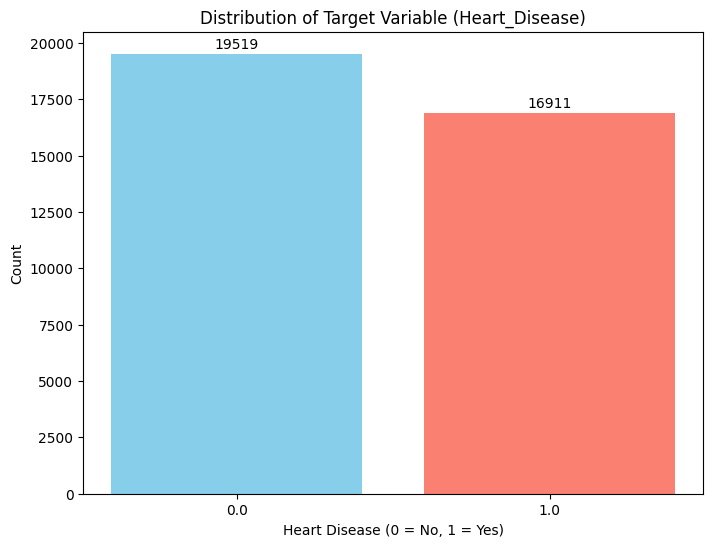

In [ ]:
# Target variable distribution
import matplotlib.pyplot as plt

# Get value counts for the target variable 'Heart_Disease'
target_counts = df['Heart_Disease'].value_counts()

# Calculate percentages
target_percentages = (df['Heart_Disease'].value_counts(normalize=True) * 100)

# Print the counts and percentages
print("Target Variable ('Heart_Disease') Distribution:")
print(target_counts)
print("\nPercentage Distribution:")
print(target_percentages)

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(target_counts.index.astype(str), target_counts.values, color=['skyblue', 'salmon'])

# Adding title and labels
plt.title('Distribution of Target Variable (Heart_Disease)')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Adding text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, int(yval), ha='center', va='bottom')

# Save the plot
plt.savefig('target_variable_distribution.png')

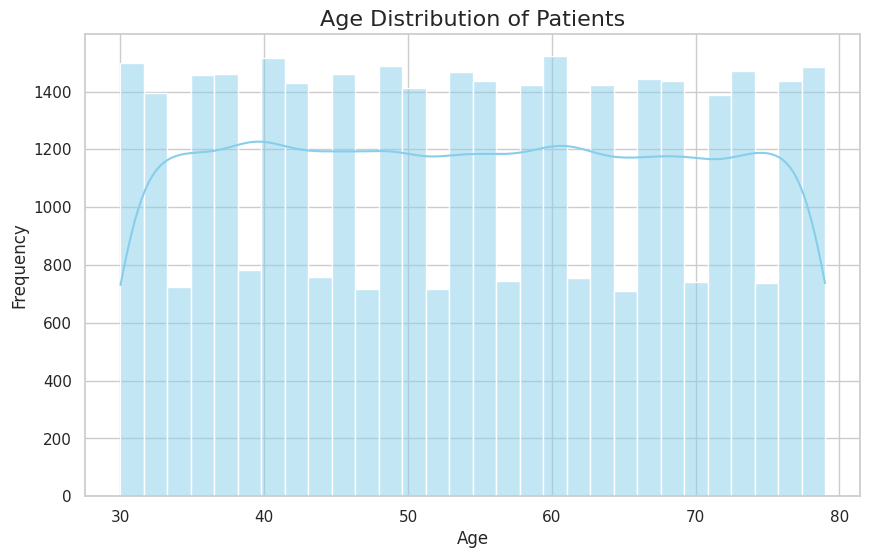

In [ ]:
# Age distribution
import seaborn as sns # Import seaborn
import matplotlib.pyplot as plt # Ensure plt is also imported for completeness

# Set the visual style
sns.set_theme(style="whitegrid")

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the distribution of Age
# kde=True adds the Kernel Density Estimate curve
sns.histplot(df['Age'], kde=True, bins=30, color='skyblue')

# Add labels and title
plt.title('Age Distribution of Patients', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Save the plot
plt.savefig('age_distribution.png')

Gender Distribution Counts:
Gender
Female    18282
Male      18149
Name: count, dtype: int64

Gender Distribution Percentages:
Gender
Female    50.182537
Male      49.817463
Name: proportion, dtype: float64


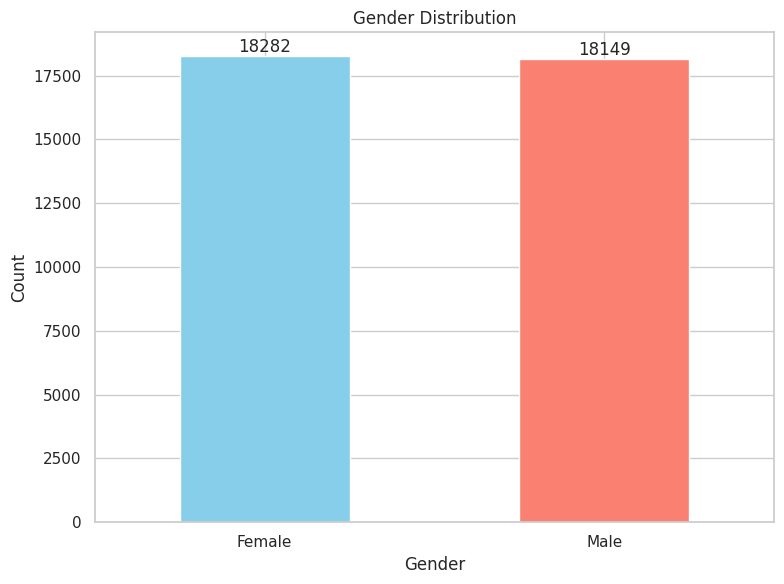

In [ ]:
#Gender distribution
# Calculate counts for each gender
gender_counts = df['Gender'].value_counts()

# Calculate percentages for each gender
gender_percentages = df['Gender'].value_counts(normalize=True) * 100

print("Gender Distribution Counts:")
print(gender_counts)
print("\nGender Distribution Percentages:")
print(gender_percentages)

# Create a bar chart
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Add count labels on top of the bars
for index, value in enumerate(gender_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('gender_distribution.png')

Weight Descriptive Statistics:
count    36431.000000
mean        84.562570
std         20.231844
min         50.000000
25%         67.000000
50%         85.000000
75%        102.000000
max        119.000000
Name: Weight, dtype: float64


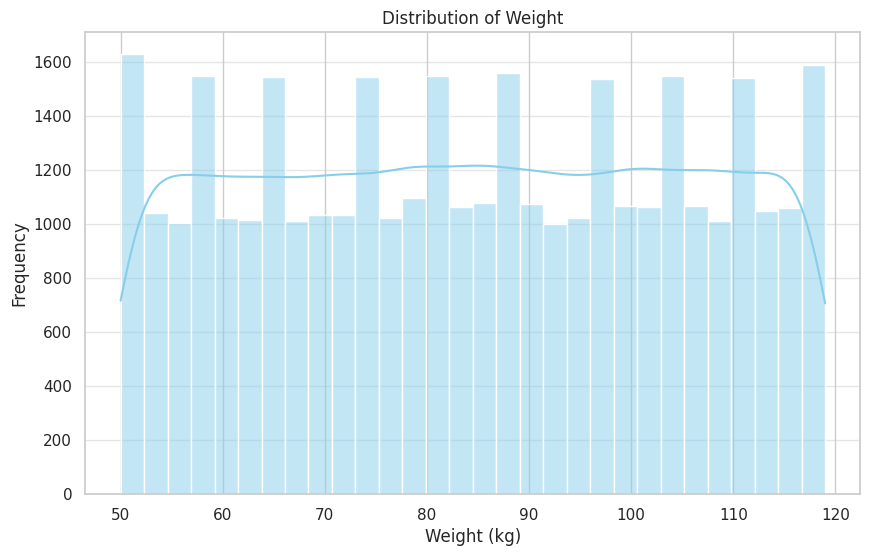

In [ ]:
#Weight distribution
#  Calculate descriptive statistics
print("Weight Descriptive Statistics:")
print(df['Weight'].describe())

#  Create a distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Weight'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)

# Save/Show the plot
plt.savefig('weight_distribution.png')

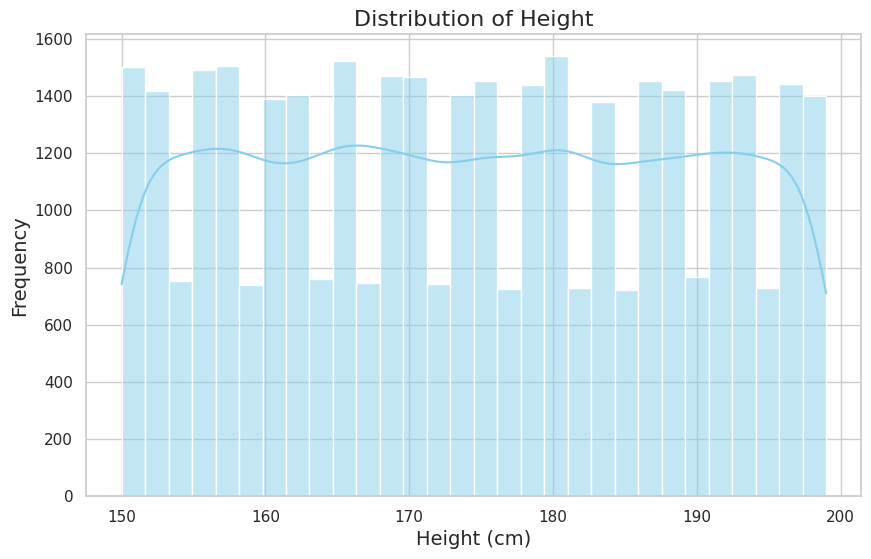

In [ ]:
#Height distribution
# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Plot the distribution of the 'Height' column
# kde=True adds a Kernel Density Estimate curve to smooth the distribution
sns.histplot(df['Height'], kde=True, bins=30, color='skyblue')

# Add titles and labels
plt.title('Distribution of Height', fontsize=16)
plt.xlabel('Height (cm)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Save the plot
plt.savefig('height_distribution.png')

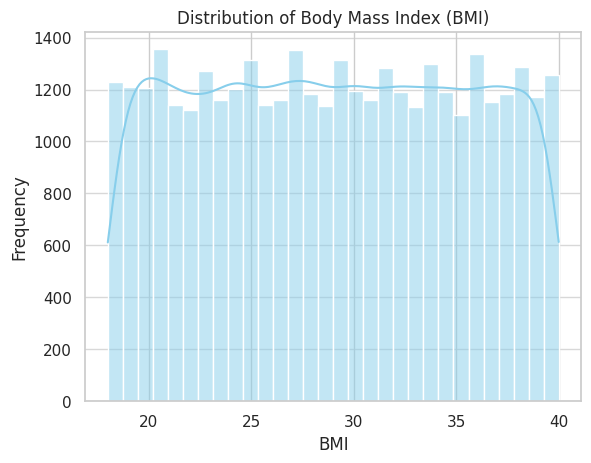

In [ ]:
#BMI  distribution
# Create a histogram with a Kernel Density Estimate (KDE) line
sns.histplot(df['BMI'], kde=True, bins=30, color='skyblue')

# Add titles and labels
plt.title('Distribution of Body Mass Index (BMI)')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Save the plot
plt.savefig('bmi_distribution.png')

# Show the plot
plt.show()

Smoking Distribution (Counts):
Smoking
Never      14779
Former      4797
Current     4716
Name: count, dtype: int64

Smoking Distribution (Percentage):
Smoking
Never      60.838959
Former     19.747242
Current    19.413799
Name: proportion, dtype: float64


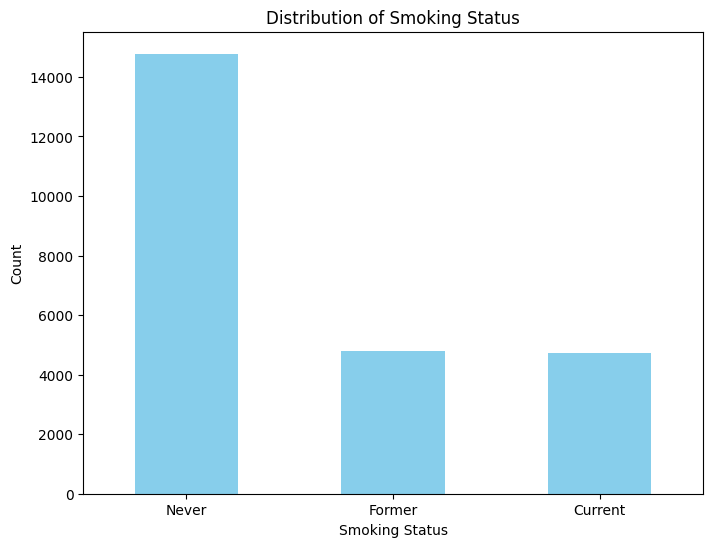

In [ ]:
#Smoking distribution
import pandas as pd
import matplotlib.pyplot as plt

# Ensure df is loaded. This duplicates loading if previous cells ran, but prevents NameError if they didn't.
# It's assumed the file 'synthetic_heart_disease_dataset.csv' is available.
try:
    df = pd.read_csv('synthetic_heart_disease_dataset.csv')
except FileNotFoundError:
    print("Error: 'synthetic_heart_disease_dataset.csv' not found. Please ensure the file is uploaded.")
    # Create an empty DataFrame to avoid further NameErrors if file is missing
    df = pd.DataFrame()

# Proceed only if df is not empty after attempting to load
if not df.empty:
    # Calculate the counts for each smoking status
    smoking_counts = df['Smoking'].value_counts()

    # Calculate the percentage for each smoking status
    smoking_percentage = df['Smoking'].value_counts(normalize=True) * 100

    # Print the text results
    print("Smoking Distribution (Counts):")
    print(smoking_counts)
    print("\nSmoking Distribution (Percentage):")
    print(smoking_percentage)

    # Create a bar chart for visualization
    plt.figure(figsize=(8, 6))
    smoking_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribution of Smoking Status')
    plt.xlabel('Smoking Status')
    plt.ylabel('Count')
    plt.xticks(rotation=0)

    # Save the plot
    plt.savefig('smoking_distribution.png')
else:
    print("DataFrame is empty, cannot proceed with smoking distribution analysis.")

Alcohol Intake Counts:
 Alcohol_Intake
NaN         9823
Low         7269
Moderate    4727
High        2474
Name: count, dtype: int64


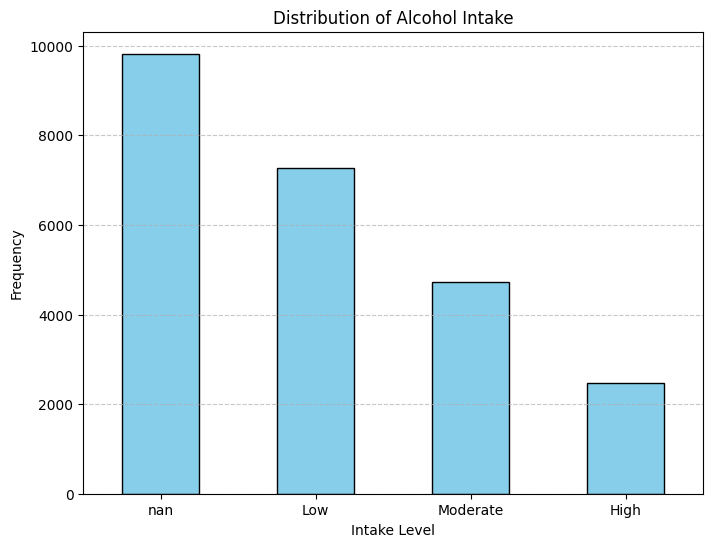

In [ ]:
#Alcohol intake distribution
# Calculate value counts including NaN (missing values)
alcohol_counts = df['Alcohol_Intake'].value_counts(dropna=False)
print("Alcohol Intake Counts:\n", alcohol_counts)

# Create a bar plot
plt.figure(figsize=(8, 6))
alcohol_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Alcohol Intake')
plt.xlabel('Intake Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Rotate x-labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the figure
plt.savefig('alcohol_intake_distribution.png')


Physical Activity Counts:
Physical_Activity
Moderate     12099
Sedentary     7365
Active        4828
Name: count, dtype: int64

Physical Activity Percentages:
Physical_Activity
Moderate     49.806521
Sedentary    30.318623
Active       19.874856
Name: proportion, dtype: float64


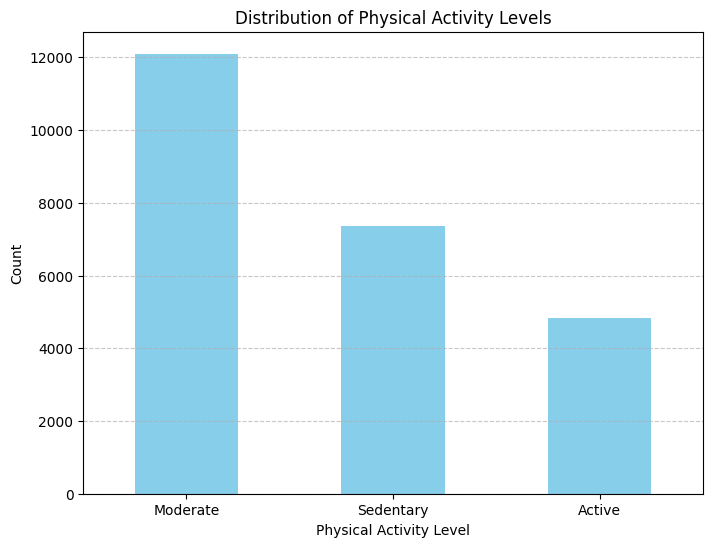

In [ ]:
#physical activity distribution
# Get the count for each category
activity_counts = df['Physical_Activity'].value_counts()
print("Physical Activity Counts:")
print(activity_counts)

# Get the percentage for each category
activity_percentages = df['Physical_Activity'].value_counts(normalize=True) * 100
print("\nPhysical Activity Percentages:")
print(activity_percentages)

# Plotting
plt.figure(figsize=(8, 6))
activity_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Physical Activity Levels')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
plt.savefig('physical_activity_distribution.png')

Diet Distribution Counts:
Diet
Average      12244
Healthy       7308
Unhealthy     4740
Name: count, dtype: int64


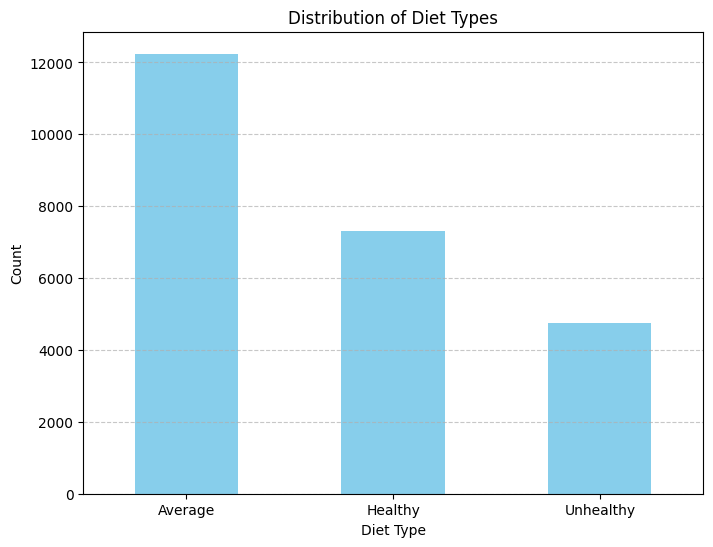

In [ ]:
#Diet distribution
# Calculate the counts for each diet category
diet_counts = df['Diet'].value_counts()

# Print the numerical distribution
print("Diet Distribution Counts:")
print(diet_counts)

# Create a bar chart
plt.figure(figsize=(8, 6))
diet_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Diet Types')
plt.xlabel('Diet Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Keep labels horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot
plt.savefig('diet_distribution.png')

Stress Level Distribution:
Stress_Level
Medium    9799
Low       9669
High      4824
Name: count, dtype: int64


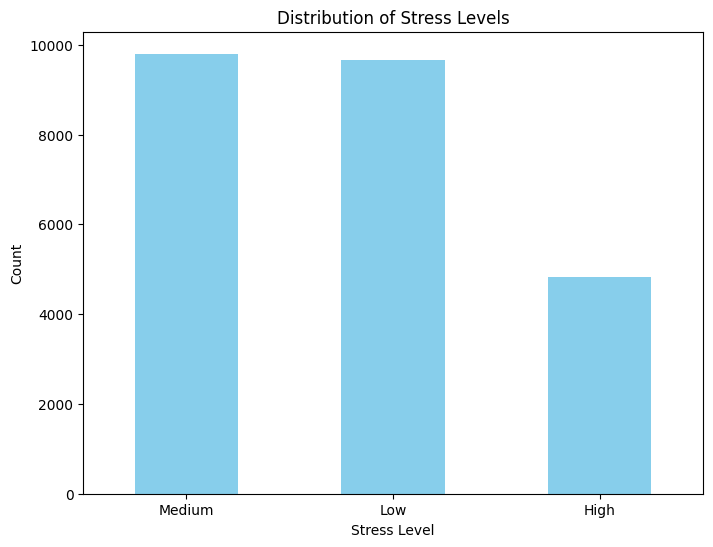

In [ ]:
#stress level distribution
# Calculate the count of each stress level
stress_counts = df['Stress_Level'].value_counts()
print("Stress Level Distribution:")
print(stress_counts)

# Create a bar chart for visualization
plt.figure(figsize=(8, 6))
stress_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.xticks(rotation=0) # Keep labels horizontal
plt.savefig('stress_level_distribution.png')

Hypertension Distribution (Counts):
Hypertension
0.0    16938
1.0     7354
Name: count, dtype: int64

Hypertension Distribution (Percentages):
Hypertension
0.0    69.726659
1.0    30.273341
Name: proportion, dtype: float64


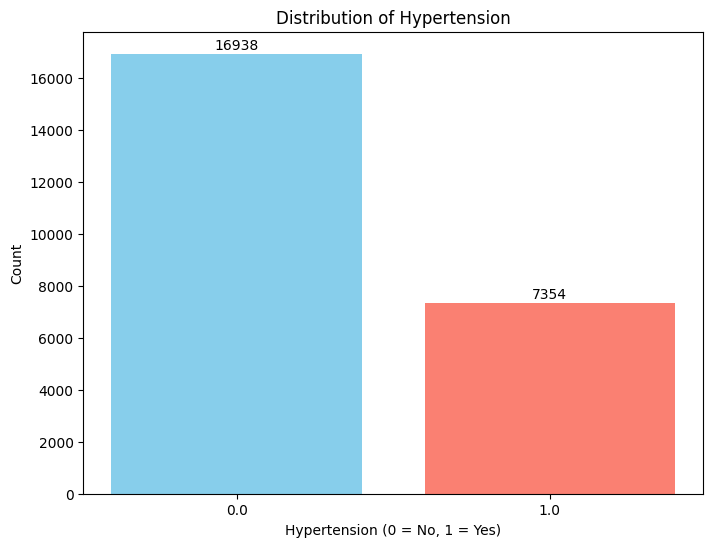

In [ ]:
#Hypertension distribution
# Calculate the counts for Hypertension
hypertension_counts = df['Hypertension'].value_counts().sort_index()

# Calculate percentages
hypertension_percentages = (df['Hypertension'].value_counts(normalize=True).sort_index()) * 100

print("Hypertension Distribution (Counts):")
print(hypertension_counts)
print("\nHypertension Distribution (Percentages):")
print(hypertension_percentages)

# Plotting the distribution
plt.figure(figsize=(8, 6))
bars = plt.bar(hypertension_counts.index.astype(str), hypertension_counts.values, color=['skyblue', 'salmon'])

# Adding labels and title
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Distribution of Hypertension')

# Adding text labels on top of the bars for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, int(yval), ha='center', va='bottom')

# Save the plot
plt.savefig('hypertension_distribution.png')

Diabetes Distribution Counts:
Diabetes
0.0    19451
1.0     4841
Name: count, dtype: int64

Diabetes Distribution Percentages:
Diabetes
0.0    80.071629
1.0    19.928371
Name: proportion, dtype: float64


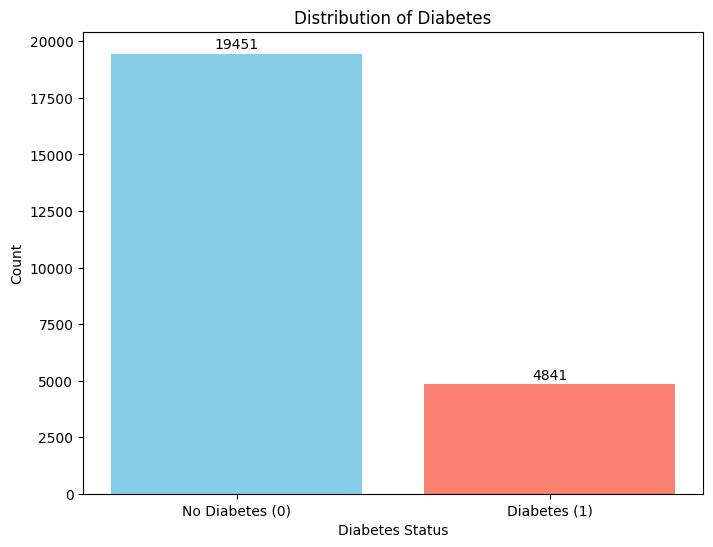

In [ ]:
#Diabetes distribution
# Calculate value counts for Diabetes
diabetes_counts = df['Diabetes'].value_counts().sort_index()

# Calculate percentages
diabetes_percentages = df['Diabetes'].value_counts(normalize=True).sort_index() * 100

# Create a bar chart
plt.figure(figsize=(8, 6))
# Create the bar plot.
# Since 'Diabetes' is 0 or 1, we can map them to labels for better readability in the plot
bars = plt.bar(diabetes_counts.index.astype(str), diabetes_counts.values, color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Distribution of Diabetes')
plt.xticks(ticks=[0, 1], labels=['No Diabetes (0)', 'Diabetes (1)'])

# Add text labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, int(yval), ha='center', va='bottom')

# Save the plot
plt.savefig('diabetes_distribution.png')

# Print counts and percentages for the user
print("Diabetes Distribution Counts:")
print(diabetes_counts)
print("\nDiabetes Distribution Percentages:")
print(diabetes_percentages)

Hyperlipidemia Distribution Counts:
Hyperlipidemia
0.0    18155
1.0     6137
Name: count, dtype: int64

Hyperlipidemia Distribution Percentages:
Hyperlipidemia
0.0    74.736539
1.0    25.263461
Name: proportion, dtype: float64


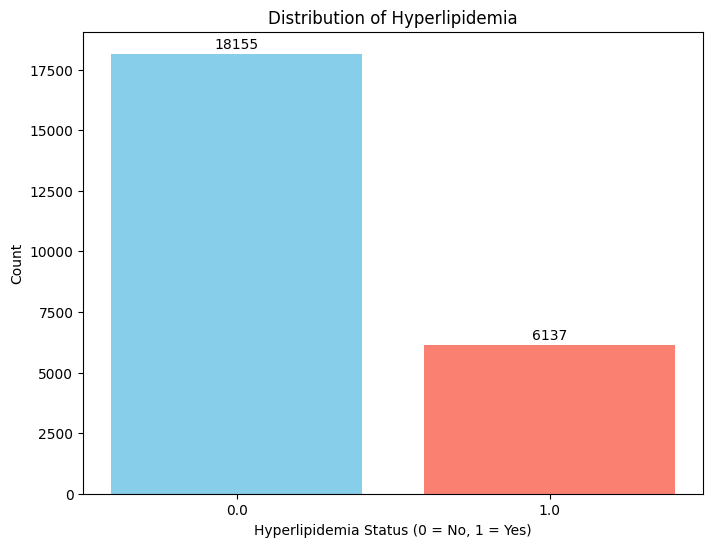

In [ ]:
#Hyperlipidemia distribution
# Calculate the value counts
hyperlipidemia_counts = df['Hyperlipidemia'].value_counts().sort_index()

# Print the counts and percentages
print("Hyperlipidemia Distribution Counts:")
print(hyperlipidemia_counts)
print("\nHyperlipidemia Distribution Percentages:")
print(df['Hyperlipidemia'].value_counts(normalize=True).sort_index() * 100)

# Create a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(hyperlipidemia_counts.index.astype(str), hyperlipidemia_counts.values, color=['skyblue', 'salmon'])

# Add title and labels
plt.title('Distribution of Hyperlipidemia')
plt.xlabel('Hyperlipidemia Status (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Add counts on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, int(yval), ha='center', va='bottom')

# Save the plot
plt.savefig('hyperlipidemia_distribution.png')

Family History Distribution (Counts):
Family_History
0.0    14641
1.0     9651
Name: count, dtype: int64

Family History Distribution (Percentage):
Family_History
0.0    60.270871
1.0    39.729129
Name: proportion, dtype: float64


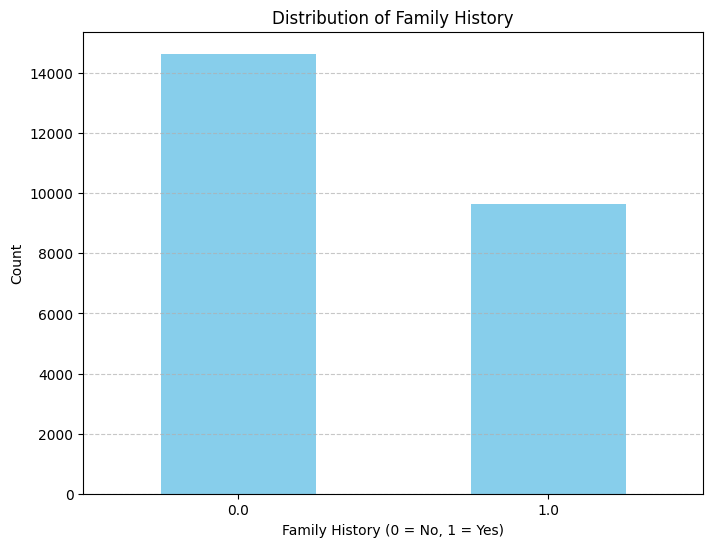

In [ ]:
#Family_History distribution
import matplotlib.pyplot as plt

# Calculate the counts for Family_History
family_history_counts = df['Family_History'].value_counts().sort_index()

# Calculate the percentage distribution
family_history_percentage = df['Family_History'].value_counts(normalize=True) * 100

print("Family History Distribution (Counts):")
print(family_history_counts)
print("\nFamily History Distribution (Percentage):")
print(family_history_percentage)

# Create a bar chart to visualize the distribution
plt.figure(figsize=(8, 6))
family_history_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Family History')
plt.xlabel('Family History (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('family_history_distribution.png')

Count Distribution:
Previous_Heart_Attack
0.0    21887
1.0     2405
Name: count, dtype: int64

Percentage Distribution:
Previous_Heart_Attack
0.0    90.099621
1.0     9.900379
Name: proportion, dtype: float64


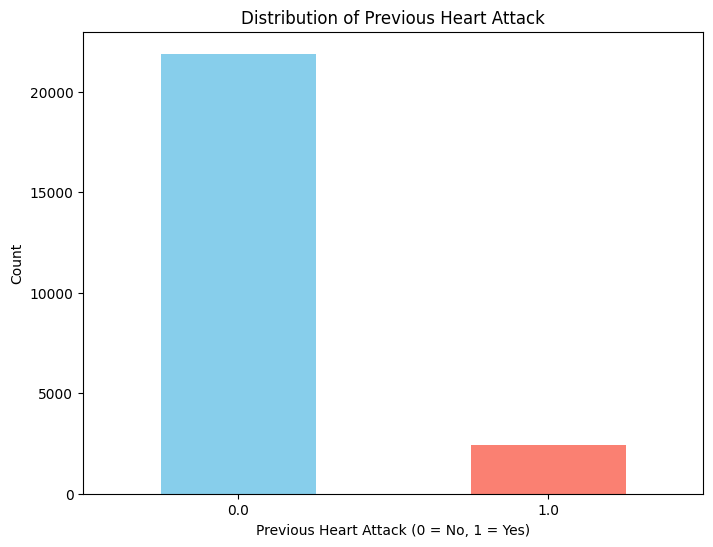

In [ ]:
#Previous_Heart_Attack distribution
# Calculate the count distribution
distribution = df['Previous_Heart_Attack'].value_counts()
print("Count Distribution:")
print(distribution)

# Calculate the percentage distribution
percentage_distribution = df['Previous_Heart_Attack'].value_counts(normalize=True) * 100
print("\nPercentage Distribution:")
print(percentage_distribution)

# Create a bar plot to visualize the distribution
plt.figure(figsize=(8, 6))
distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Previous Heart Attack')
plt.xlabel('Previous Heart Attack (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('previous_heart_attack_distribution.png')

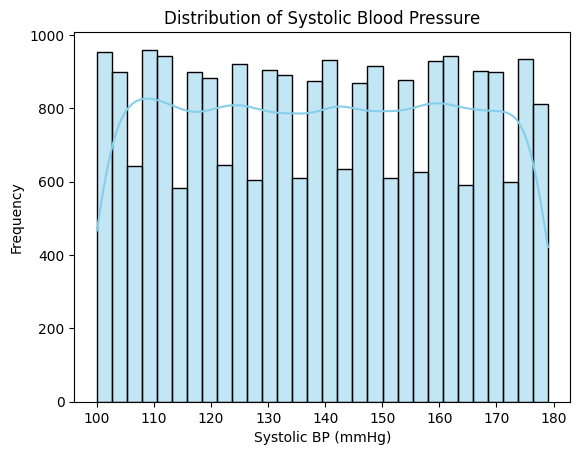

In [ ]:
#Systolic_BP distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of Systolic_BP
# kde=True adds a Kernel Density Estimate line to smooth the histogram
sns.histplot(df['Systolic_BP'], kde=True, bins=30, color='skyblue')

# Set titles and labels
plt.title('Distribution of Systolic Blood Pressure')
plt.xlabel('Systolic BP (mmHg)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

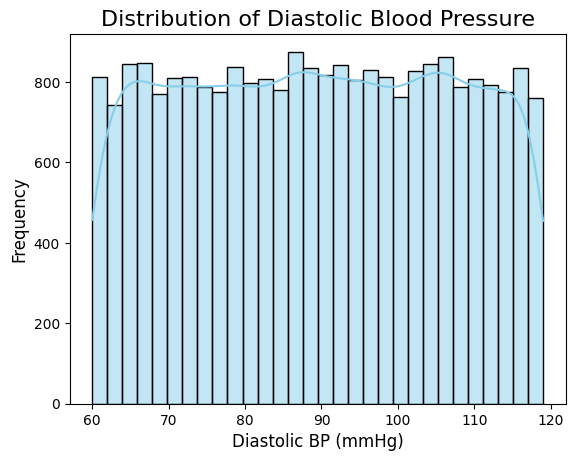

In [ ]:
#Diastolic_BP distribution
# Plot the distribution of 'Diastolic_BP'
# kde=True adds a Kernel Density Estimate curve to smooth the histogram
sns.histplot(df['Diastolic_BP'], kde=True, color='skyblue', bins=30)

# Add title and labels
plt.title('Distribution of Diastolic Blood Pressure', fontsize=16)
plt.xlabel('Diastolic BP (mmHg)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Save or show the plot
plt.savefig('diastolic_bp_distribution.png')
# plt.show() # Uncomment this line if running locally to display the plot window

Heart Rate Statistics:
count    24292.000000
mean        84.428536
std         14.438958
min         60.000000
25%         72.000000
50%         84.000000
75%         97.000000
max        109.000000
Name: Heart_Rate, dtype: float64


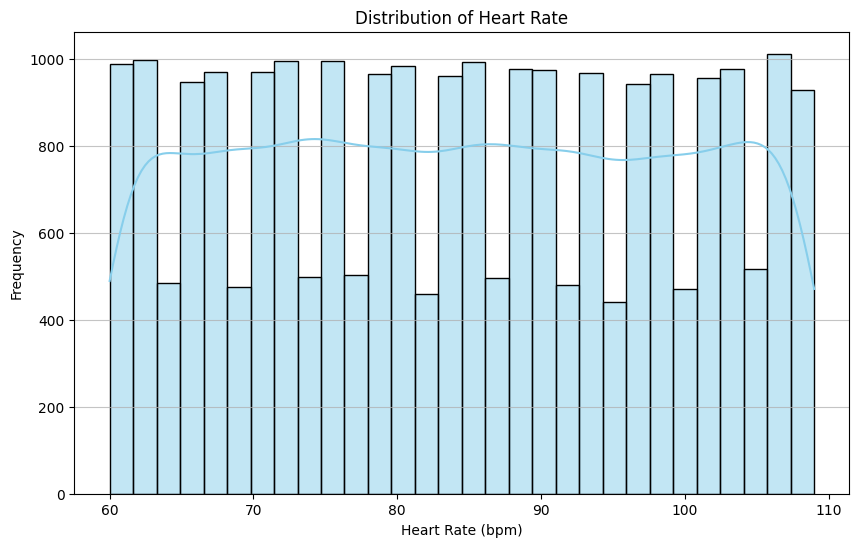

In [ ]:
#Heart_Rate distribution
# Calculate descriptive statistics
stats = df['Heart_Rate'].describe()
print("Heart Rate Statistics:")
print(stats)

# Create a histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Heart_Rate'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Save the plot
plt.savefig('heart_rate_distribution.png')

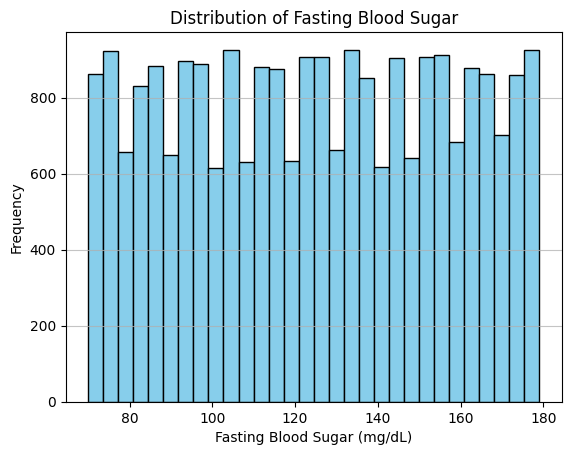

In [ ]:
#Blood_Sugar_Fasting distribution
plt.hist(df['Blood_Sugar_Fasting'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar (mg/dL)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Save and show the plot
plt.savefig('blood_sugar_distribution.png')
plt.show()

count    24292.000000
mean       224.527169
std         43.075661
min        150.000000
25%        187.000000
50%        225.000000
75%        261.000000
max        299.000000
Name: Cholesterol_Total, dtype: float64


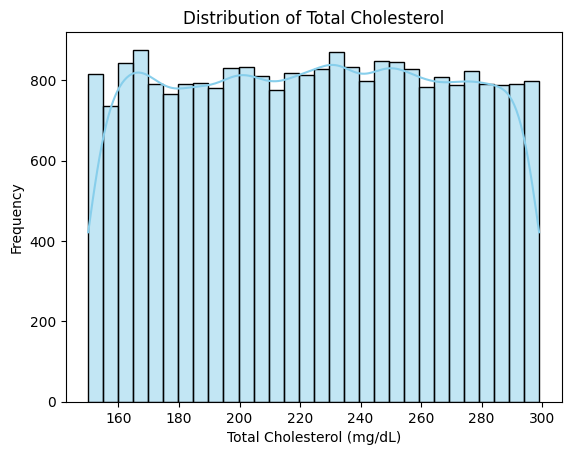

In [ ]:
#Cholesterol_Total distribution
sns.histplot(df['Cholesterol_Total'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Total Cholesterol')
plt.xlabel('Total Cholesterol (mg/dL)')
plt.ylabel('Frequency')

# Save the plot
plt.savefig('cholesterol_distribution.png')

# Calculate descriptive statistics
cholesterol_stats = df['Cholesterol_Total'].describe()
print(cholesterol_stats)

Heart Disease Counts:
Heart_Disease
0.0    12970
1.0    11322
Name: count, dtype: int64

Heart Disease Percentage:
Heart_Disease
0.0    53.392063
1.0    46.607937
Name: proportion, dtype: float64


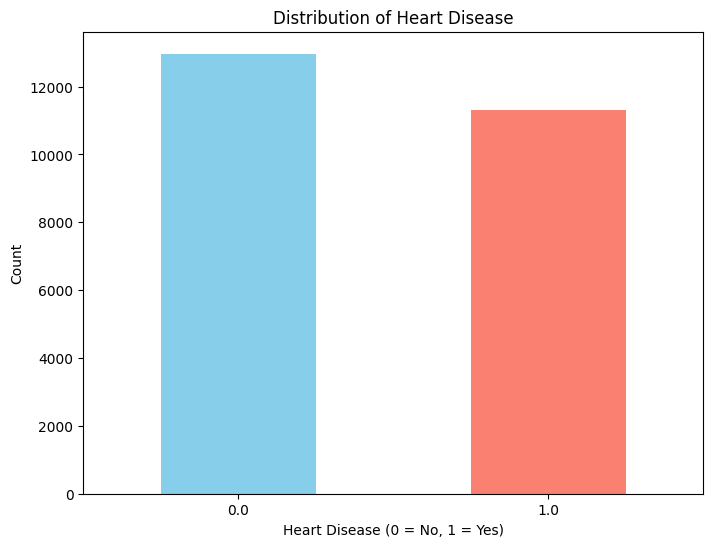

In [ ]:
#Heart_Disease distribution
# Calculate the counts for each class
heart_disease_counts = df['Heart_Disease'].value_counts()
print("Heart Disease Counts:")
print(heart_disease_counts)

# Calculate the percentage for each class
heart_disease_percentage = df['Heart_Disease'].value_counts(normalize=True) * 100
print("\nHeart Disease Percentage:")
print(heart_disease_percentage)

# Visualize the distribution
plt.figure(figsize=(8, 6))
heart_disease_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('heart_disease_distribution.png')

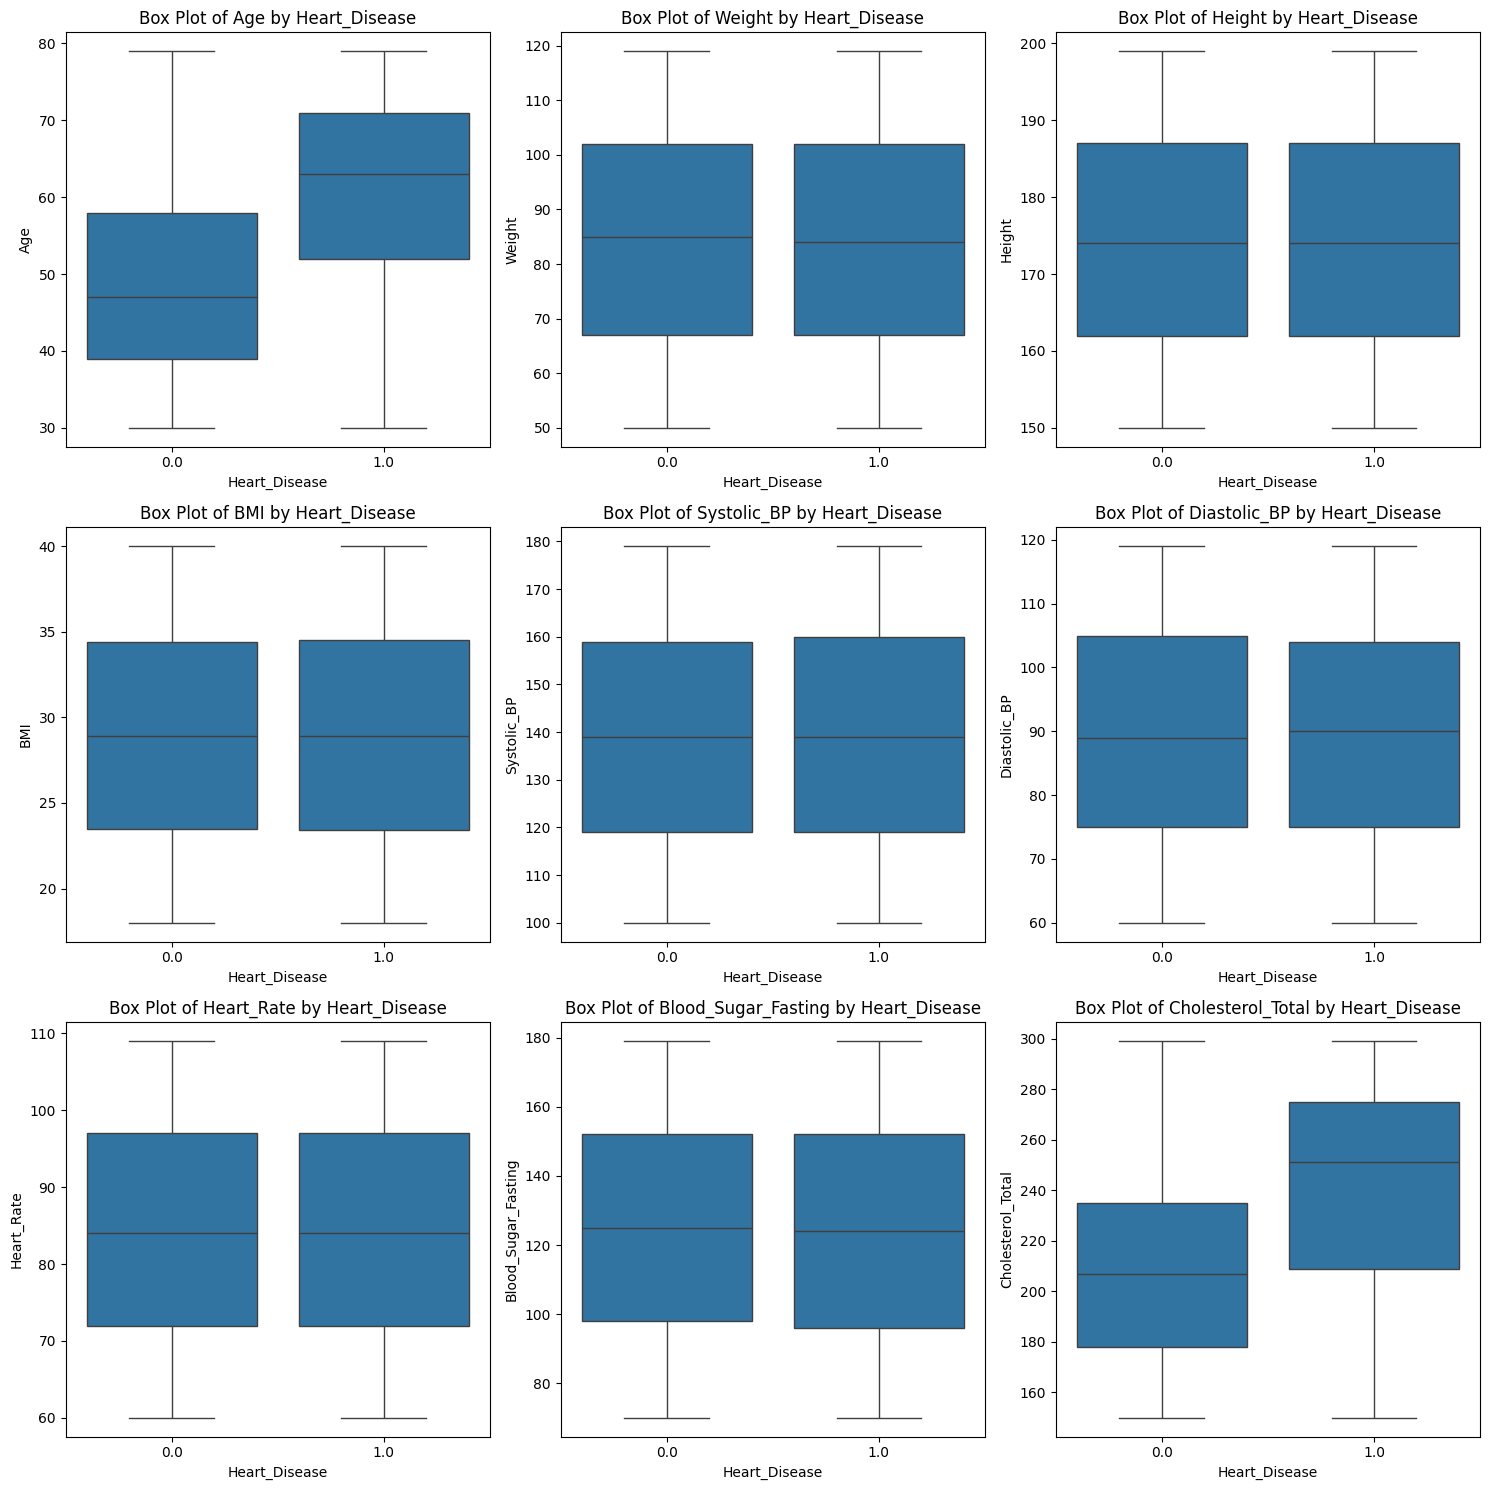

In [ ]:
# Box plots for numerical features by Result
# Identify the target column.
# The user asked for "Result", but the dataset has "Heart_Disease".
target_col = 'Heart_Disease'

# Identify numerical columns
numerical_cols = ['Age', 'Weight', 'Height', 'BMI', 'Systolic_BP', 'Diastolic_BP',
                  'Heart_Rate', 'Blood_Sugar_Fasting', 'Cholesterol_Total']

# Set up the matplotlib figure
num_plots = len(numerical_cols)
cols = 3
rows = (num_plots + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=target_col, y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} by {target_col}')
    axes[i].set_xlabel(target_col)
    axes[i].set_ylabel(col)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('boxplots_numerical_by_heart_disease.png')

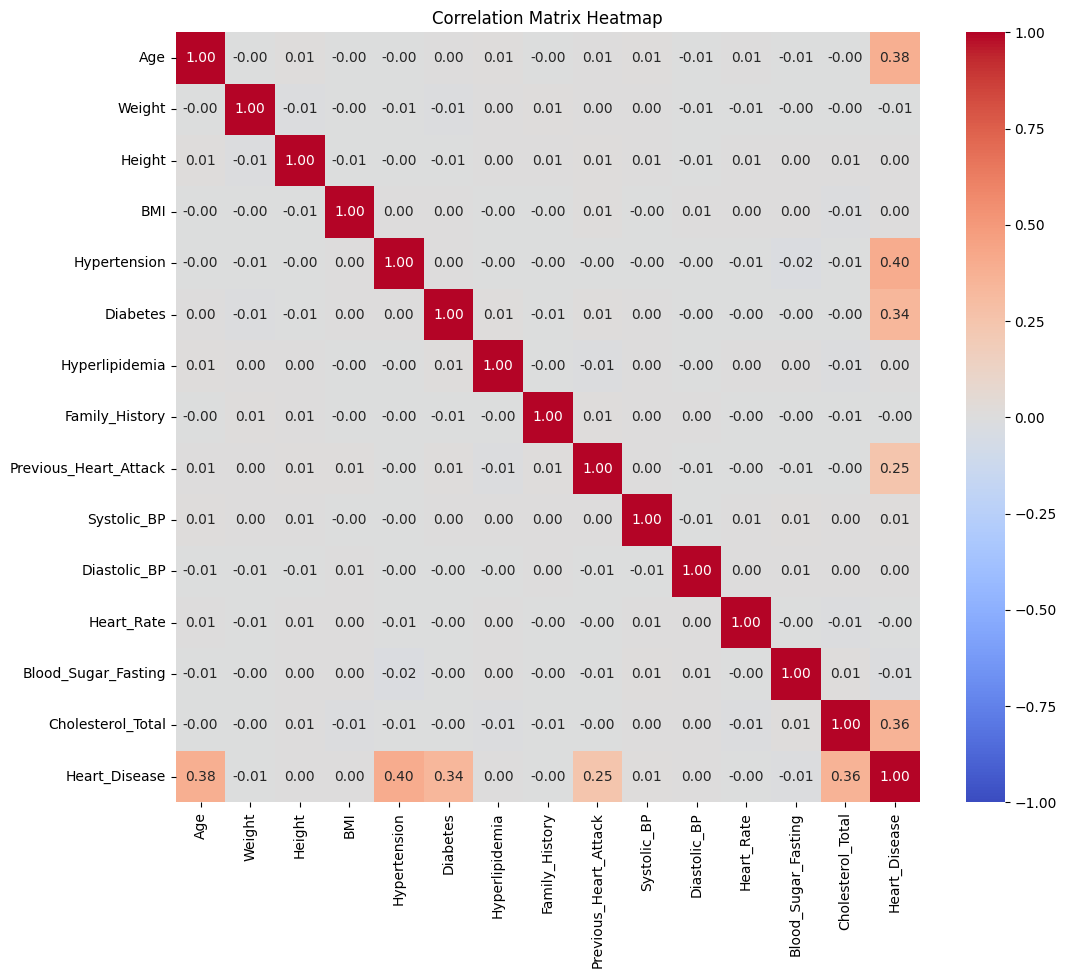

In [ ]:
# Correlation matrix heatmap
# Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')

# Save the plot
plt.savefig('correlation_heatmap.png')

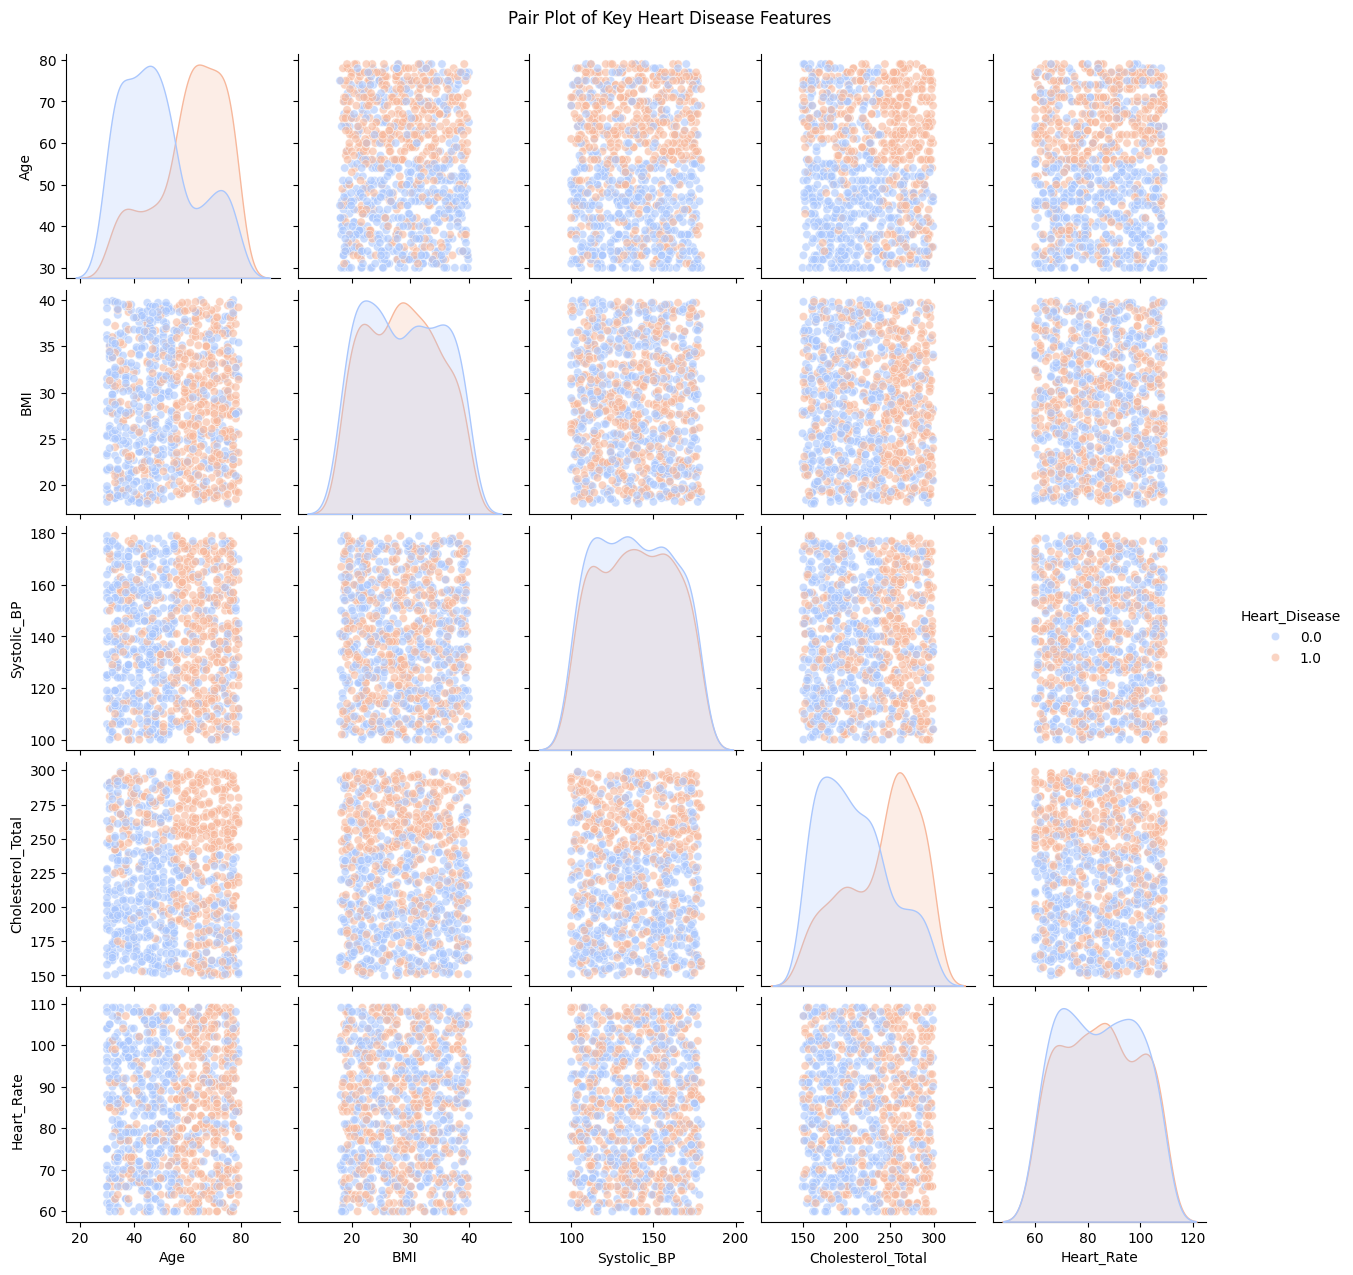

In [ ]:
# Pair plot for key features
# Select key numerical features to visualize
key_features = ['Age', 'BMI', 'Systolic_BP', 'Cholesterol_Total', 'Heart_Rate', 'Heart_Disease']

# Sample the data for better visualization performance and clarity
# (Plotting 50,000 points can make the plot unreadable)
plot_df = df[key_features].sample(n=1000, random_state=42)

# Create the pair plot
# hue='Heart_Disease' colors the points based on the target variable
sns.pairplot(plot_df, hue='Heart_Disease', palette='coolwarm', diag_kind='kde', plot_kws={'alpha': 0.6})

# Add a title and adjust layout
plt.suptitle('Pair Plot of Key Heart Disease Features', y=1.02)

# Save the plot
plt.savefig('pair_plot_key_features.png')

## 3.Data Preprocessing

In [ ]:
from google.colab import files
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. This will ask you to upload the file manually
uploaded = files.upload()

# 2. This loads the file you just uploaded into 'df'
# It automatically grabs the filename you uploaded
filename = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print(f"SUCCESS: Loaded {filename} with {len(df)} rows.")


def preprocess_inputs(df_input):
    # Create a copy to avoid modifying the original DataFrame accidentally
    df_processed = df_input.copy()

    # 1. Handling Missing Values
    # Fill NaNs in Alcohol_Intake with 'None' if it exists
    if 'Alcohol_Intake' in df_processed.columns:
        df_processed['Alcohol_Intake'] = df_processed['Alcohol_Intake'].fillna('None')

    # Drop any remaining rows with NaN values (e.g., from Smoking, Physical_Activity, etc.)
    df_processed.dropna(inplace=True)

    # 2. Encoding Categorical Variables
    # Define mappings for ordinal/nominal variables
    mappings = {
        'Stress_Level': {'Low': 0, 'Medium': 1, 'High': 2},
        'Diet': {'Unhealthy': 0, 'Average': 1, 'Healthy': 2},
        'Alcohol_Intake': {'None': 0, 'Low': 1, 'Moderate': 2, 'High': 3},
        'Physical_Activity': {'Sedentary': 0, 'Moderate': 1, 'Active': 2},
        'Smoking': {'Never': 0, 'Former': 1, 'Current': 2},
        'Gender': {'Male': 0, 'Female': 1}
    }

    # Apply mappings
    for col, mapping in mappings.items():
        if col in df_processed.columns:
            df_processed[col] = df_processed[col].map(mapping)
            # If there are any unmapped values, they will become NaN. Drop them.
            if df_processed[col].isnull().any():
                print(f"Warning: Unmapped values found in '{col}' after encoding. Dropping corresponding rows.")
                df_processed.dropna(subset=[col], inplace=True)
    return df_processed


# --- 1. PREPROCESS ---
# Call the defined preprocess_inputs function
X = preprocess_inputs(df.drop('Heart_Disease', axis=1))
y = df['Heart_Disease']

# Align y with X after dropping NaNs in preprocessing
y = y.loc[X.index]

# --- 2. SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# --- 3. SCALE ---
scaler = StandardScaler()
scaler.fit(X_train) # Learn from training data

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

print("Split and Scaling Complete.")
print("Training Data Shape:", X_train_scaled.shape)


Saving synthetic_heart_disease_dataset.csv to synthetic_heart_disease_dataset (1).csv
SUCCESS: Loaded synthetic_heart_disease_dataset (1).csv with 50000 rows.
Split and Scaling Complete.
Training Data Shape: (40000, 20)


# 4.Model Training and Evaluation

Training the model...
Training complete.
------------------------------------------------
Model Accuracy: 92.62%
------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5342
           1       0.92      0.92      0.92      4658

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



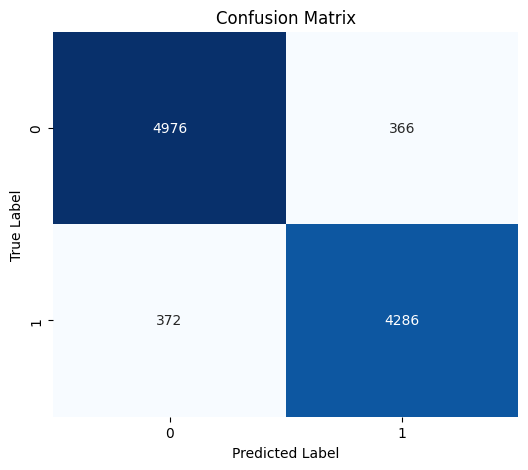

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 1: INITIALIZE & TRAIN ---
# We use Logistic Regression as a baseline model
model = LogisticRegression()

print("Training the model...")
model.fit(X_train_scaled, y_train)
print("Training complete.")

# --- STEP 2: PREDICT ---
y_pred = model.predict(X_test_scaled)

# --- STEP 3: EVALUATE ---
# 1. Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print("------------------------------------------------")
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("------------------------------------------------")

# 2. Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)

# Heatmap: Darker colors = higher numbers
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Create comparison DataFrame


# --- Create the Comparison DataFrame ---
# We use .values for y_test to ignore original indices and align correctly with y_pred
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

# --- Add a 'Correct' Column ---
# Returns True if the prediction matched the actual value, False otherwise
results_df['Correct'] = results_df['Actual'] == results_df['Predicted']

# --- Display the Results ---
print("First 10 Predictions:")
print(results_df.head(10))

# --- Optional: Inspect Errors ---
# This filters the DataFrame to show only the rows where the model failed
errors = results_df[results_df['Correct'] == False]
print(f"\nTotal Missed Predictions: {len(errors)}")
print("Sample of Errors:")
print(errors.head())

First 10 Predictions:
   Actual  Predicted  Correct
0       1          1     True
1       1          0    False
2       0          0     True
3       1          1     True
4       1          1     True
5       1          1     True
6       0          1    False
7       1          1     True
8       0          0     True
9       1          1     True

Total Missed Predictions: 738
Sample of Errors:
    Actual  Predicted  Correct
1        1          0    False
6        0          1    False
13       1          0    False
57       1          0    False
73       1          0    False


Training models...
Logistic Regression accuracy: 92.62%
Random Forest accuracy: 100.00%


/tmp/ipython-input-3093150369.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")


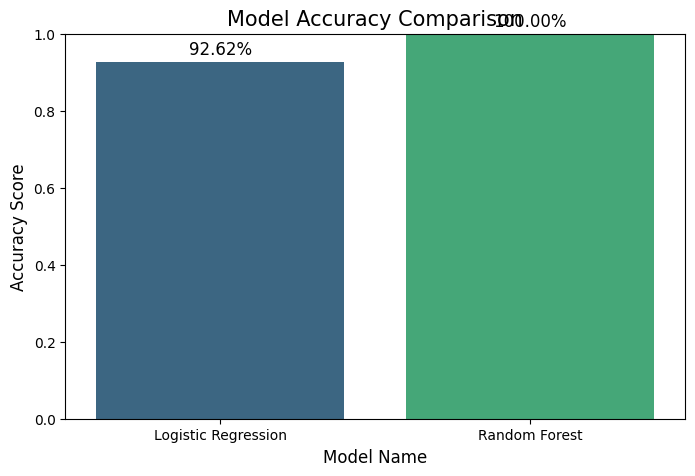

In [ ]:
# Visualize model comparison
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- STEP 1: DEFINE MODELS ---
# We create a dictionary to hold the models we want to compare
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# --- STEP 2: TRAIN AND EVALUATE ---
results = []

print("Training models...")
for name, model in models.items():
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Predict
    score = model.score(X_test_scaled, y_test)

    # Store result
    results.append({"Model": name, "Accuracy": score})
    print(f"{name} accuracy: {score:.2%}")

# Create a DataFrame for easier plotting
results_df = pd.DataFrame(results)

# --- STEP 3: VISUALIZE COMPARISON ---
plt.figure(figsize=(8, 5))

# Create the bar plot
sns.barplot(x="Model", y="Accuracy", data=results_df, palette="viridis")

# Add chart labels
plt.ylim(0, 1.0) # Set y-axis to run from 0% to 100%
plt.title("Model Accuracy Comparison", fontsize=15)
plt.ylabel("Accuracy Score", fontsize=12)
plt.xlabel("Model Name", fontsize=12)

# Add the actual numbers on top of the bars
for index, row in results_df.iterrows():
    plt.text(index, row.Accuracy + 0.02, f"{row.Accuracy:.2%}",
             color='black', ha="center", fontsize=12)

plt.show()

Training models and calculating metrics...

--- Model Performance Metrics ---
                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.9262     0.9213  0.9201    0.9207
1        Random Forest    1.0000     1.0000  1.0000    1.0000
2                  SVM    0.9472     0.9445  0.9420    0.9433
3    Gradient Boosting    1.0000     1.0000  1.0000    1.0000


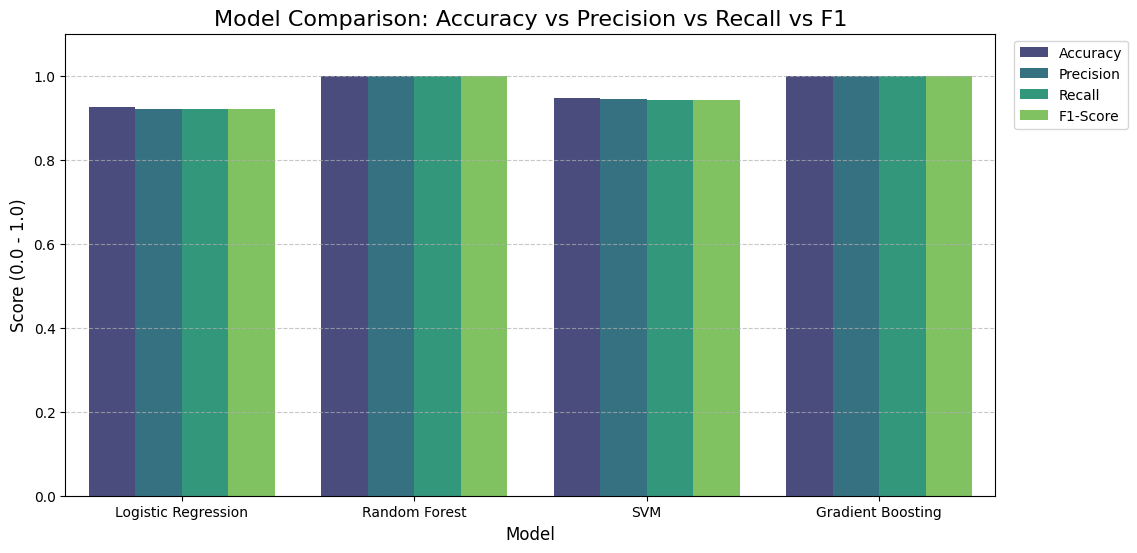

In [ ]:
#Matrices comparison
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- STEP 1: DEFINE MODELS ---
# We will compare 4 popular models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# --- STEP 2: TRAIN & CALCULATE METRICS ---
results_list = []

print("Training models and calculating metrics...")

for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Calculate all 4 metrics
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }
    results_list.append(metrics)

# Create DataFrame
results_df = pd.DataFrame(results_list)

# --- STEP 3: DISPLAY DATA TABLE ---
print("\n--- Model Performance Metrics ---")
print(results_df.round(4)) # Print rounded numbers for readability

# --- STEP 4: VISUALIZE COMPARISON ---
# We need to "melt" the data to make it suitable for a grouped bar chart
df_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Score", hue="Metric", data=df_melted, palette="viridis")

plt.title("Model Comparison: Accuracy vs Precision vs Recall vs F1", fontsize=16)
plt.ylabel("Score (0.0 - 1.0)", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.ylim(0, 1.1) # Give space for legend
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1)) # Move legend outside
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Generating Confusion Matrices...


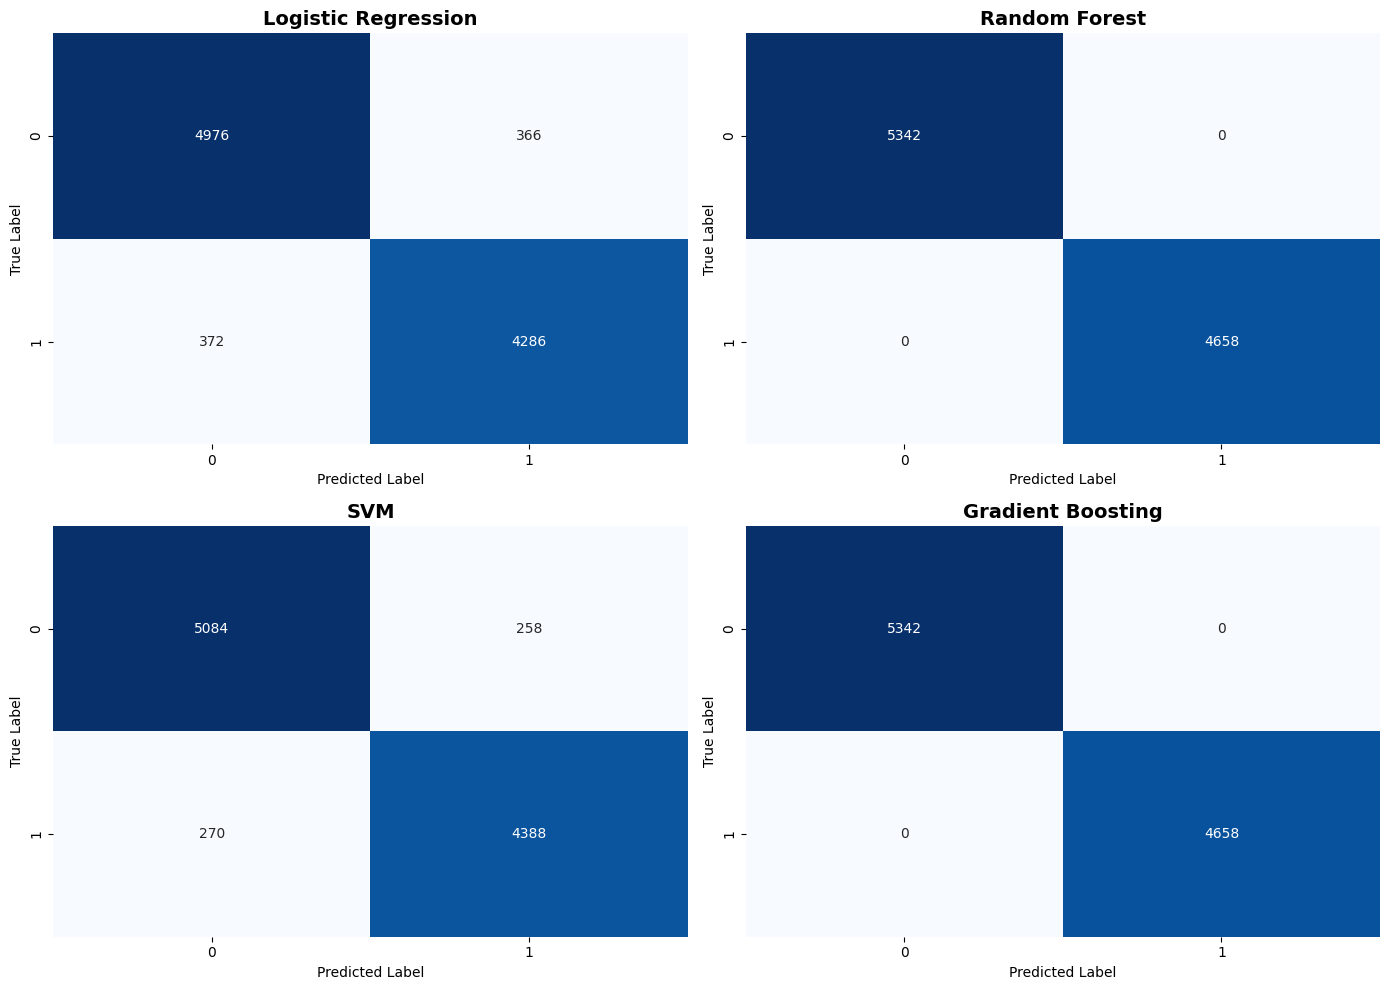

In [ ]:
# Confusion Matrices for all models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- STEP 1: DEFINE MODELS ---
# (Using the same models as before for consistency)
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# --- STEP 2: SETUP PLOTTING GRID ---
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten() # Flattens the 2x2 grid into a 1D array for easier looping

print("Generating Confusion Matrices...")

# --- STEP 3: TRAIN AND PLOT ---
for i, (name, model) in enumerate(models.items()):
    # Train
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Calculate Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot Heatmap on the specific subplot (axes[i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[i])

    # Labels and Titles
    axes[i].set_title(f"{name}", fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Calculating ROC Curves...


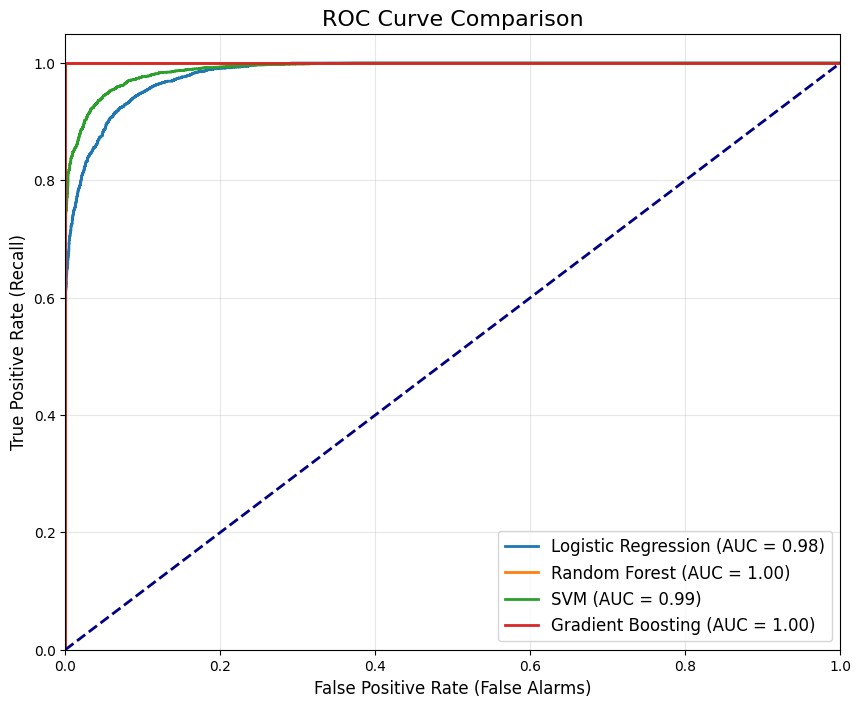

In [ ]:
# ROC Curves for models with probability predictions
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# --- STEP 1: DEFINE MODELS ---
# Note: SVC requires probability=True to use predict_proba()
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

plt.figure(figsize=(10, 8))

# --- STEP 2: TRAIN AND PLOT ---
print("Calculating ROC Curves...")

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Get predicted probabilities for the "Positive" class (Heart Disease = 1)
    # [:, 1] grabs the second column (probability of class 1)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate False Positive Rate (fpr) and True Positive Rate (tpr)
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Calculate Area Under Curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot the curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# --- STEP 3: FORMATTING ---
# Add the "Random Guess" diagonal line (dashed)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (False Alarms)', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curve Comparison', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)

plt.show()

/tmp/ipython-input-2113741267.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importance, ax=axes[0], palette='viridis')
/tmp/ipython-input-2113741267.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=gb_importance, ax=axes[1], palette='magma')


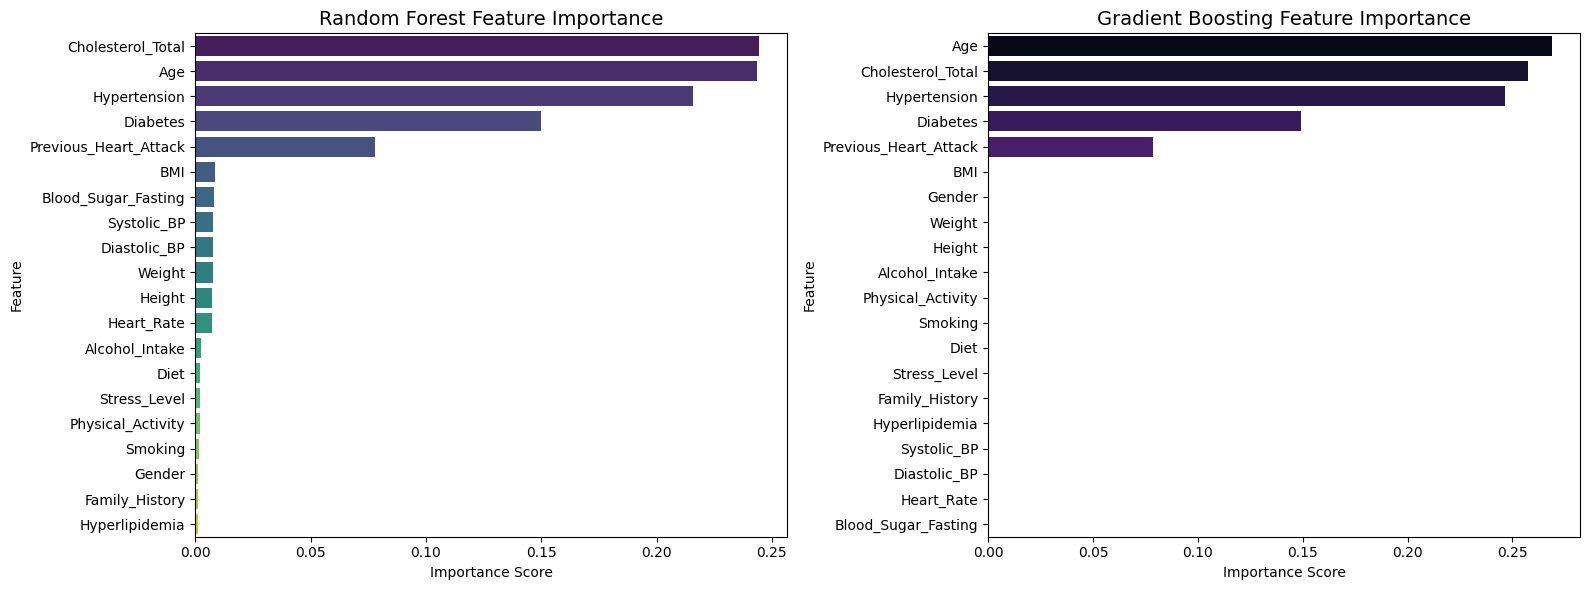

In [ ]:
# Feature importance for tree-based models
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# --- STEP 1: TRAIN MODELS ---
# We train them again just to be sure we have the fresh state
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

rf_model.fit(X_train_scaled, y_train)
gb_model.fit(X_train_scaled, y_train)

# --- STEP 2: EXTRACT IMPORTANCE ---
# Helper function to create a sorted dataframe for plotting
def get_feature_importance(model, feature_names):
    feature_imp = pd.DataFrame({
        'Feature': feature_names,
        'Importance': model.feature_importances_
    })
    # Sort by importance (highest on top)
    return feature_imp.sort_values(by='Importance', ascending=False)

# Get data for both models
# Note: We use X.columns to get the original feature names
rf_importance = get_feature_importance(rf_model, X.columns)
gb_importance = get_feature_importance(gb_model, X.columns)

# --- STEP 3: VISUALIZE SIDE-BY-SIDE ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Random Forest
sns.barplot(x='Importance', y='Feature', data=rf_importance, ax=axes[0], palette='viridis')
axes[0].set_title('Random Forest Feature Importance', fontsize=14)
axes[0].set_xlabel('Importance Score')

# Plot Gradient Boosting
sns.barplot(x='Importance', y='Feature', data=gb_importance, ax=axes[1], palette='magma')
axes[1].set_title('Gradient Boosting Feature Importance', fontsize=14)
axes[1].set_xlabel('Importance Score')

plt.tight_layout()
plt.show()

Running 5-Fold Cross-Validation (this may take a moment)...
--------------------------------------------------
Model                     | Mean Accuracy   | Std Dev   
--------------------------------------------------
Logistic Regression       | 92.46%        | 0.0028
Random Forest             | 100.00%        | 0.0000
SVM                       | 94.57%        | 0.0017
Gradient Boosting         | 100.00%        | 0.0000


/tmp/ipython-input-3122506718.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names, patch_artist=True)


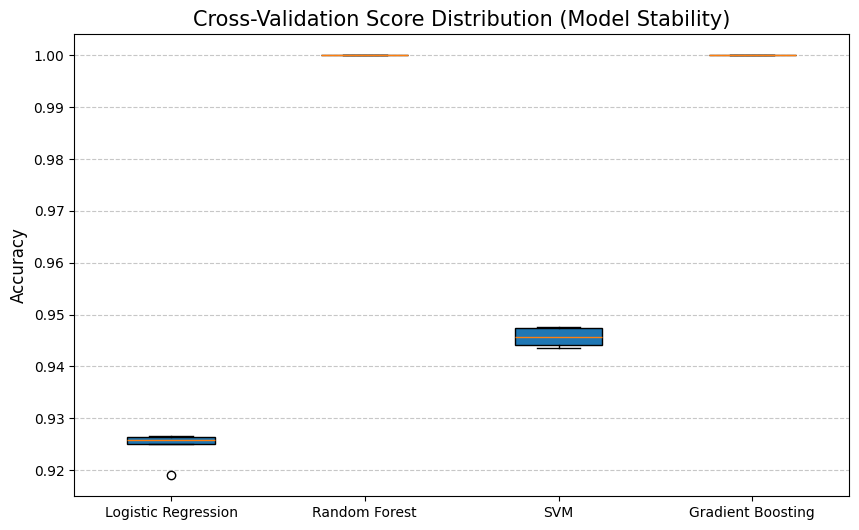

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# --- STEP 1: DEFINE MODELS ---
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# --- STEP 2: CALCULATE CROSS-VALIDATION SCORES ---
# We use StratifiedKFold to ensure each fold has the same % of sick people
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
names = []

print("Running 5-Fold Cross-Validation (this may take a moment)...")
print("-" * 50)
print(f"{'Model':<25} | {'Mean Accuracy':<15} | {'Std Dev':<10}")
print("-" * 50)

for name, model in models.items():
    # Create a pipeline: Scale Data -> Train Model
    # We use 'X_train' (unscaled) here because the pipeline handles scaling for us
    pipeline = make_pipeline(StandardScaler(), model)

    # Calculate scores
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

    # Store results for plotting
    results.append(cv_scores)
    names.append(name)

    print(f"{name:<25} | {cv_scores.mean():.2%}        | {cv_scores.std():.4f}")

# --- STEP 3: VISUALIZE STABILITY ---
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names, patch_artist=True)
plt.title('Cross-Validation Score Distribution (Model Stability)', fontsize=15)
plt.ylabel('Accuracy', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Calculating 5-Fold Scores for visualization...


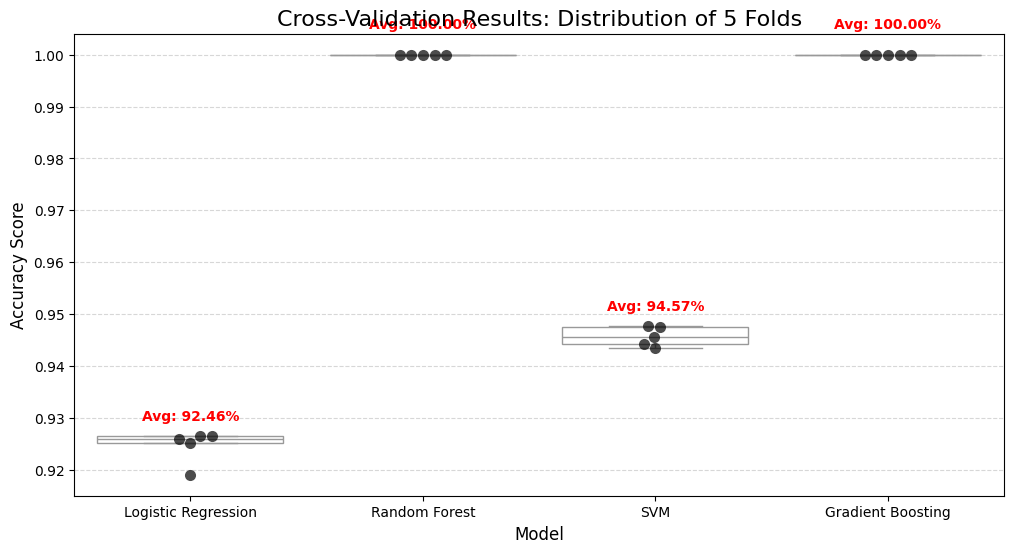

In [ ]:
# Visualize cross-validation results
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# --- STEP 1: CALCULATE SCORES ---
# (If you already ran the previous cell, you can skip this step,
# but I included it here to make this cell self-contained)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results_data = []

print("Calculating 5-Fold Scores for visualization...")

for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), model)
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')

    # Store every single score for the plot
    for score in scores:
        results_data.append({"Model": name, "Accuracy": score})

# Convert to DataFrame for Seaborn
df_cv = pd.DataFrame(results_data)

# --- STEP 2: VISUALIZE ---
plt.figure(figsize=(12, 6))

# A. Create the Box Plot (Shows the range/distribution)
sns.boxplot(x="Model", y="Accuracy", data=df_cv,
            color='white',  # White background for box
            showfliers=False) # Hide outliers (we will see them in swarmplot)

# B. Overlay the Swarm Plot (Shows individual fold scores as dots)
sns.swarmplot(x="Model", y="Accuracy", data=df_cv,
              color='black', size=8, alpha=0.7)

# Formatting
plt.title('Cross-Validation Results: Distribution of 5 Folds', fontsize=16)
plt.ylabel('Accuracy Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Calculate and display the mean accuracy on the plot
means = df_cv.groupby('Model')['Accuracy'].mean()
for i, name in enumerate(models.keys()):
    plt.text(i, means[name] + 0.005, f"Avg: {means[name]:.2%}",
             ha='center', color='red', fontweight='bold')

plt.show()

Comparing models to find the best one...

🏆 The Best Model is: Random Forest with 100.00% accuracy.

--- Detailed Classification Report for Random Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5342
           1       1.00      1.00      1.00      4658

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



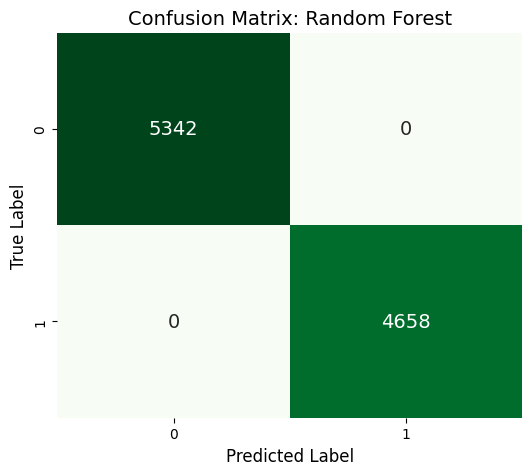

In [ ]:
#Detailed classification report for the best model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- STEP 1: FIND THE BEST MODEL ---
best_model_name = ""
best_accuracy = 0
best_model_instance = None

print("Comparing models to find the best one...")

for name, model in models.items():
    # Fit model (ensuring it's fresh)
    model.fit(X_train_scaled, y_train)

    # Check accuracy
    score = model.score(X_test_scaled, y_test)

    if score > best_accuracy:
        best_accuracy = score
        best_model_name = name
        best_model_instance = model

print(f"\n🏆 The Best Model is: {best_model_name} with {best_accuracy:.2%} accuracy.")

# --- STEP 2: DETAILED REPORT FOR THE WINNER ---
# Make predictions using the winner
y_pred_best = best_model_instance.predict(X_test_scaled)

print(f"\n--- Detailed Classification Report for {best_model_name} ---")
print(classification_report(y_test, y_pred_best))

# --- STEP 3: VISUALIZE THE WINNER'S ERRORS ---
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False, annot_kws={"size": 14})
plt.title(f'Confusion Matrix: {best_model_name}', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

Calculating metrics for comparison chart...


Text(0, 0.5, 'Score (0.0 - 1.0)')

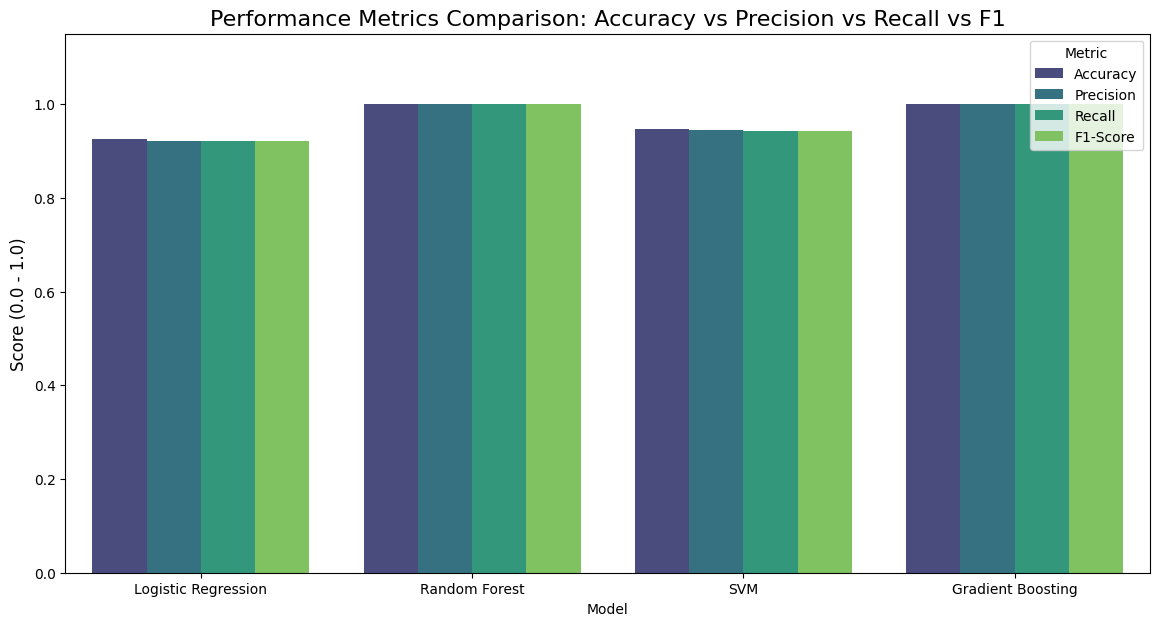

In [ ]:
# Performance metrics comparison chart
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- STEP 1: CALCULATE METRICS FOR ALL MODELS ---
# (Assumes 'models', 'X_test_scaled', and 'y_test' are already defined from previous steps)

metrics_data = []

print("Calculating metrics for comparison chart...")

for name, model in models.items():
    # Predict
    y_pred = model.predict(X_test_scaled)

    # Calculate all 4 metrics
    metrics_data.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics_data)

# --- STEP 2: RESHAPE DATA FOR PLOTTING ---
# "Melt" the dataframe so we can plot multiple bars per model
df_melted = df_metrics.melt(id_vars="Model", var_name="Metric", value_name="Score")

# --- STEP 3: VISUALIZE ---
plt.figure(figsize=(14, 7))

# Create Grouped Bar Chart
plot = sns.barplot(x="Model", y="Score", hue="Metric", data=df_melted, palette="viridis")

# Formatting
plt.title("Performance Metrics Comparison: Accuracy vs Precision vs Recall vs F1", fontsize=16)
plt.ylim(0, 1.15) # Add space at top for legend
plt.ylabel("Score (0.0 - 1.0)", fontsize=12)